### Assignment 2

In [916]:
### Import necessary libraries
import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns # Higher-level, more aesthetically pleasing plots.
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.


In [917]:
# load CSV
df = pd.read_csv('atp_tennis.csv')

In [918]:
# Display the first 5 rows of the DataFrame to understand its structure.
df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


In [919]:
# Returns the number of rows and columns in the DataFrame.
df.shape

(66061, 17)

In [920]:
# Returns information about the DataFrame, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66061 entries, 0 to 66060
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  66061 non-null  object 
 1   Date        66061 non-null  object 
 2   Series      66061 non-null  object 
 3   Court       66061 non-null  object 
 4   Surface     66061 non-null  object 
 5   Round       66061 non-null  object 
 6   Best of     66061 non-null  int64  
 7   Player_1    66061 non-null  object 
 8   Player_2    66061 non-null  object 
 9   Winner      66061 non-null  object 
 10  Rank_1      66061 non-null  int64  
 11  Rank_2      66061 non-null  int64  
 12  Pts_1       66061 non-null  int64  
 13  Pts_2       66061 non-null  int64  
 14  Odd_1       66061 non-null  float64
 15  Odd_2       66061 non-null  float64
 16  Score       66061 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.6+ MB


In [921]:
# check dupplications
dup_count = df.duplicated().sum()
print("total count：", dup_count)



total count： 0


In [922]:
# transfer Date Dtype from object to datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")


In [923]:
# check if there is rank is less than 1 in the data, these are bad data need to be removed.

bad_mask = (df["Rank_1"] < 1) | (df["Rank_2"] < 1)
bad_rows = df.loc[bad_mask]
print("rows that Rank（<1）：", len(bad_rows))

# show some bad examplers
cols_show = [c for c in ["Date","Tournament","Round","Player_1","Rank_1","Player_2","Rank_2"] if c in df.columns]
display(bad_rows[cols_show].head(10))

# delete these bad rows
before = len(df)
df = df.loc[~bad_mask].reset_index(drop=True)
after = len(df)
print(f"delete rows: {before - after} ；After：{df.shape}")


rows that Rank（<1）： 26


,Date,Tournament,Round,Player_1,Rank_1,Player_2,Rank_2
63,2000-01-03,Qatar Open,1st Round,Al-Alawi S.K.,-1,Berasategui A.,60
369,2000-02-14,Kroger St. Jude,1st Round,Jensen L.,-1,Mamiit C.,135
549,2000-02-28,Citrix Tennis Championships,1st Round,Roddick A.,-1,Tieleman L.,104
599,2000-03-06,Colombia Open,1st Round,Gonzalez P.,-1,Etlis G.,137
601,2000-03-06,Colombia Open,1st Round,Hadad M.,-1,Hantschk M.,105
606,2000-03-06,Colombia Open,1st Round,Puerta M.,72,Cortes J.,-1
759,2000-03-23,Ericsson Open,2nd Round,Fish M.,-1,Haas T.,21
1018,2000-05-01,Mallorca Open,1st Round,Bastl G.,71,Garcia M.,-1
1804,2000-07-17,Croatia Open,1st Round,Damm M.,80,Peschek D.,-1
3439,2001-02-26,Dubai Championships,1st Round,Eagle J.,-1,Boutter J.,56


delete rows: 26 ；After：(66035, 17)


In [924]:
# build 2 new dataframes player1 and player 2
# each dataframes has player1/2 names , match date, and the rank at that date.

player1 = pd.DataFrame({
    "player": df["Player_1"],
    "date": df["Date"],
    "rank": df["Rank_1"],
})
player2 = pd.DataFrame({
    "player": df["Player_2"],
    "date": df["Date"],
    "rank": df["Rank_2"],
})

# combine two dataframe into one. 
long = pd.concat([player1, player2], ignore_index=True)
long = long.dropna(subset=["player", "date"]).copy()

# added year colum to the list
long["year"] = long["date"].dt.year.astype(int)

# the rows should be doubled
print("long shape:", long.shape)
pd.concat({'head': long.head(5), 'tail': long.tail(5)})


long shape: (132070, 4)


player       date  rank  year
head 0           Dosedel S. 2000-01-03    63  2000
     1           Clement A. 2000-01-03    56  2000
     2            Escude N. 2000-01-03    40  2000
     3       Knippschild J. 2000-01-03    87  2000
     4          Fromberg R. 2000-01-03    81  2000
tail 132065         Rune H. 2025-08-15     9  2025
     132066      Alcaraz C. 2025-08-15     2  2025
     132067      Shelton B. 2025-08-16     6  2025
     132068       Sinner J. 2025-08-16     1  2025
     132069       Zverev A. 2025-08-16     3  2025

In [925]:
# convert player column to string, remove the SPACEs form the player names 
long["player"] = long["player"].astype(str).str.strip()


# first year is the year of the player's first match, min value of all years
# last year is the  year of the player's last match, max vaule of all years
# career year is last year - first year +1 
# peak rank is the min value of the rank in all time
first_year = long.groupby("player")["year"].min().rename("first_year")
last_year  = long.groupby("player")["year"].max().rename("last_year")
career_years = (last_year - first_year).rename("career_years") +1  
career_peak_rank = long.groupby("player")["rank"].min().rename("career_peak_rank")

#add these colum to the list
summary_core = (
    pd.concat([first_year, last_year, career_years, career_peak_rank], axis=1)
      .reset_index()  
)

# calculate the player's top rank in each year. 
# the rank of a player in a year may go up and down, only the top rank will be shown in the list for each year.
yearly_best = (
    long.groupby(["player", "year"])["rank"]
        .min()
        .unstack("year")
)

# if there is no rank in the year fill with NaN in the year list form 2000 to 2025
years = list(range(2000, 2026))
for y in years:
    if y not in yearly_best.columns:
        yearly_best[y] = np.nan
yearly_best = yearly_best[years]
yearly_best.columns = [f"rank_{y}" for y in years]
yearly_best = yearly_best.reset_index()

# merge summary_core and yearly_best, using player name as index 
summary = summary_core.merge(yearly_best, on="player", how="left")
summary["initial"] = summary["player"].str.strip().str[0].str.upper()

# re-order the list
summary = summary.sort_values(["initial", "player"]).reset_index(drop=True)
ordered_cols = (
    ["initial", "player", "first_year", "last_year", "career_years", "career_peak_rank"]
    + [f"rank_{y}" for y in years]
)
summary = summary[ordered_cols]
print("summary shape:", summary.shape)

summary.head(10)
# now we have all player's fisrt year, last year, career length, carear peak rank, and rank in each year from 2000 to 2025


summary shape: (1683, 32)


,initial,player,first_year,last_year,career_years,career_peak_rank,rank_2000,rank_2001,rank_2002,rank_2003,rank_2004,rank_2005,rank_2006,rank_2007,rank_2008,rank_2009,rank_2010,rank_2011,rank_2012,rank_2013,rank_2014,rank_2015,rank_2016,rank_2017,rank_2018,rank_2019,rank_2020,rank_2021,rank_2022,rank_2023,rank_2024,rank_2025
0,A,Abdulla M.,2005,2005,1,1349,NaN,NaN,NaN,NaN,NaN,1349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Abel M.,2002,2004,3,191,NaN,NaN,238.0,191.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Acasuso J.,2001,2011,11,20,NaN,77.0,38.0,40.0,67.0,43.0,20.0,28.0,40.0,35.0,49.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,Adaktusson J.,2006,2006,1,265,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,Agaev E.,2002,2002,1,368,NaN,NaN,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A,Agamenone F.,2022,2022,1,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,NaN
6,A,Agassi A.,2000,2006,7,1,1.0,2.0,2.0,1.0,4.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A,Agenor R.,2000,2001,2,88,88.0,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,Ager J.,2002,2004,3,295,NaN,NaN,948.0,NaN,295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A,Agostinelli B.,2009,2009,1,1171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [926]:

# beacuse I want to discover the relation between a player's early career rank and how successful the playr is. 
# so any player played less than 2 years will be removed.
# any player who already has rank in year 2000 need to be removed, since we cannot track his early years record.
# any player has more than 22 years career lengh will be deleted, most players can not play for more than 20 years, these must be wrong data or outlier
# any player who is still play will be deleted, those will be used for prediction in the future

before = len(summary)
mask = (
    (summary["career_years"] >= 2)
    & (summary["rank_2000"].isna())
    & (summary["career_years"] <= 22)
    & ~(summary["rank_2024"].notna() & summary["rank_2025"].notna())
)
filtered = (
    summary.loc[mask]
           .sort_values(["initial", "player"])
           .reset_index(drop=True)
)

before = len(summary)
print(f"kept rows: {len(filtered)} / {before} (deleted rows: {before - len(filtered)})")

deleted = summary.loc[~mask, ["player", "career_years", "rank_2000", "rank_2024", "rank_2025"]]
display(deleted.head(5))
display(deleted.tail(5))



kept rows: 699 / 1683 (deleted rows: 984)


,player,career_years,rank_2000,rank_2024,rank_2025
0,Abdulla M.,1,NaN,NaN,NaN
3,Adaktusson J.,1,NaN,NaN,NaN
4,Agaev E.,1,NaN,NaN,NaN
5,Agamenone F.,1,NaN,NaN,NaN
6,Agassi A.,7,1.0,NaN,NaN


,player,career_years,rank_2000,rank_2024,rank_2025
1672,Zhukayev B.,4,NaN,196.0,218.0
1674,Zib T.,9,100.0,NaN,NaN
1677,Zlatanovic A.,1,NaN,NaN,NaN
1679,Zovko L.,10,341.0,NaN,NaN
1681,Zverev A.,13,NaN,2.0,2.0


In [927]:
# get the rank for the first 3 years in the career 
def get_rank_for_offset(row, offset):
    
    try:
        y = int(row["first_year"]) + offset
    except Exception:
        return np.nan
    col = f"rank_{y}"
    return row[col] if col in row.index else np.nan

filtered["rank_year1"] = filtered.apply(lambda r: get_rank_for_offset(r, 0), axis=1)
filtered["rank_year2"] = filtered.apply(lambda r: get_rank_for_offset(r, 1), axis=1)
filtered["rank_year3"] = filtered.apply(lambda r: get_rank_for_offset(r, 2), axis=1)

# calculate how many time in top 100/50/20/10
rank_cols = [c for c in filtered.columns if c.startswith("rank_") and c[5:].isdigit()]
filtered["top100_count"] = (filtered[rank_cols] <= 100).sum(axis=1)
filtered["top50_count"]  = (filtered[rank_cols] <= 50).sum(axis=1)
filtered["top20_count"]  = (filtered[rank_cols] <= 20).sum(axis=1)
filtered["top10_count"]  = (filtered[rank_cols] <= 10).sum(axis=1)

# 3) reorder the list
core = ["initial", "player", "first_year", "last_year", "career_years", "career_peak_rank"]
stats_cols = ["rank_year1", "rank_year2", "rank_year3", "top100_count", "top50_count", "top20_count", "top10_count"]
year_cols = [c for c in filtered.columns if c.startswith("rank_") and c not in stats_cols]

ordered_cols = core + stats_cols + year_cols
filtered = filtered[ordered_cols]

filtered.head(10)


,initial,player,first_year,last_year,career_years,career_peak_rank,rank_year1,rank_year2,rank_year3,top100_count,top50_count,top20_count,top10_count,rank_2000,rank_2001,rank_2002,rank_2003,rank_2004,rank_2005,rank_2006,rank_2007,rank_2008,rank_2009,rank_2010,rank_2011,rank_2012,rank_2013,rank_2014,rank_2015,rank_2016,rank_2017,rank_2018,rank_2019,rank_2020,rank_2021,rank_2022,rank_2023,rank_2024,rank_2025
0,A,Abel M.,2002,2004,3,191,238.0,191.0,411.0,0,0,0,0,NaN,NaN,238.0,191.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Acasuso J.,2001,2011,11,20,77.0,38.0,40.0,10,8,1,0,NaN,77.0,38.0,40.0,67.0,43.0,20.0,28.0,40.0,35.0,49.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Ager J.,2002,2004,3,295,948.0,NaN,295.0,0,0,0,0,NaN,NaN,948.0,NaN,295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,Aguilar J.,2006,2013,8,191,397.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,397.0,NaN,NaN,NaN,223.0,226.0,NaN,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,Ahouda A.,2016,2018,3,727,834.0,946.0,727.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834.0,946.0,727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A,Ajdukovic D.,2021,2024,4,110,275.0,276.0,299.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,276.0,299.0,110.0,NaN
6,A,Al Ghareeb M.,2004,2009,6,352,720.0,NaN,352.0,0,0,0,0,NaN,NaN,NaN,NaN,720.0,NaN,352.0,370.0,NaN,469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A,Aldi F.,2003,2006,4,112,308.0,146.0,112.0,0,0,0,0,NaN,NaN,NaN,308.0,146.0,112.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,Allegro Y.,2001,2004,4,210,310.0,232.0,210.0,0,0,0,0,NaN,310.0,232.0,210.0,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A,Almagro N.,2003,2018,16,9,189.0,99.0,76.0,14,11,7,2,NaN,NaN,NaN,189.0,99.0,76.0,36.0,26.0,12.0,18.0,16.0,9.0,10.0,11.0,17.0,69.0,41.0,43.0,661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


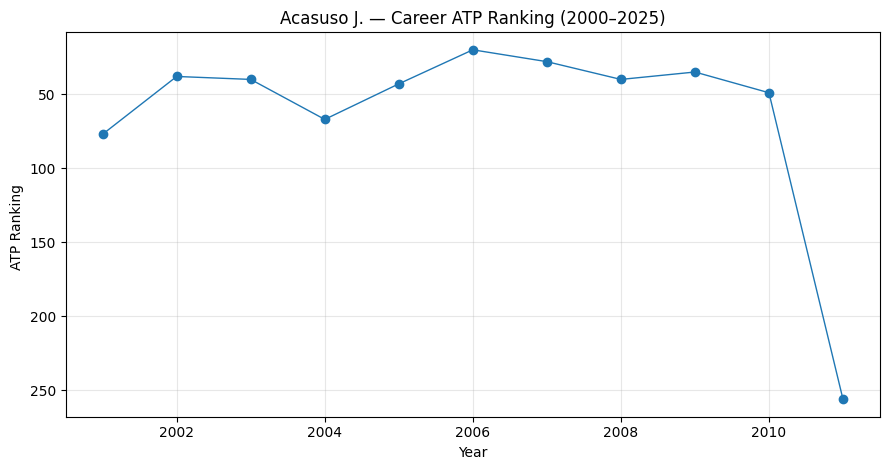

In [928]:
# draw graph to show a player who's top rank is 20, get a rough idea of what's the career peak trend looks like 
# this graph can be used to show any player's career ranking
player = "Acasuso J."         
years  = list(range(2000, 2025 + 1))
cols   = [f"rank_{y}" for y in years]

row = filtered.loc[filtered["player"] == player, ["player"] + cols].iloc[0]

ys, rs = [], []
for y, c in zip(years, cols):
    v = row[c]
    if pd.notna(v):
        ys.append(y)
        rs.append(float(v))

plt.figure(figsize=(9, 4.8))
plt.plot(ys, rs, marker="o", linewidth=1)
ax = plt.gca()
ax.invert_yaxis() 
plt.title(f"{player} — Career ATP Ranking (2000–2025)")
plt.xlabel("Year")
plt.ylabel("ATP Ranking ")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [929]:

# Select key numerical features for summary statistics
eda_cols = [
    "rank_year1", "rank_year2", "rank_year3",
    "top100_count", "top50_count", "top20_count", "top10_count",
    "career_peak_rank", "career_years"
]

# Display summary statistics: count, mean, std, min, quartiles, max
display(filtered[eda_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
rank_year1,699.0,373.987124,284.428681,1.0,184.5,285.0,454.0,2146.0
rank_year2,491.0,241.869654,186.487542,3.0,122.5,191.0,301.0,1461.0
rank_year3,443.0,208.171558,168.186729,2.0,96.5,161.0,269.5,1193.0
top100_count,699.0,2.250358,3.899009,0.0,0.0,0.0,3.0,21.0
top50_count,699.0,1.055794,2.772879,0.0,0.0,0.0,0.0,21.0
top20_count,699.0,0.313305,1.565379,0.0,0.0,0.0,0.0,19.0
top10_count,699.0,0.158798,1.191766,0.0,0.0,0.0,0.0,19.0
career_peak_rank,699.0,169.350501,161.105649,1.0,62.0,135.0,216.5,1370.0
career_years,699.0,7.540773,4.630098,2.0,4.0,7.0,11.0,22.0




1, mean of the rank from year 1 to year 3 are decreasing, most player improved themselves in these years. Although their start line is different. the std for the first year ranking is very large. some  player are aleardy NO 1 in the first year, and some start with No 2000.


2, mean of top 100 50 20 10 are very small, which means getting top100 is already very difficult.


3, mean of peak rank  is 169 , 50% is 135, most player's top rank is around 150


4, most of the player's career can last around 7 years.



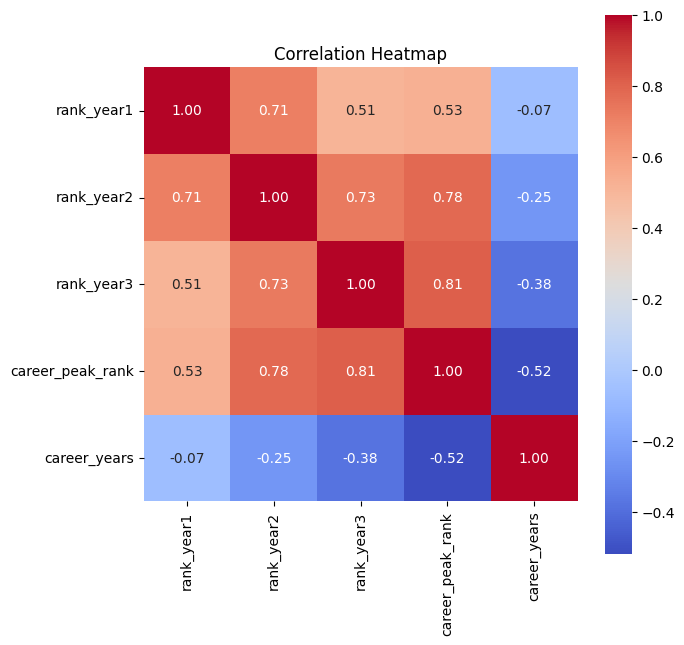

In [930]:
corr_cols = ["rank_year1","rank_year2","rank_year3","career_peak_rank","career_years"]
plt.figure(figsize=(7,7))
sns.heatmap(filtered[corr_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

1, First, Second, Third Years' Rank correlated to the peak rank is 0.53,0.78,0.81. the performance of the player in year 2 and 3 are more related to his final peak rank
the differece between year 2 and year 3 are quite small, which is a good news, so we can predicte the peak rank in the second year.

2, Career Peak Rank vs. Career Years is -0.52: better players usually have a longer career.

3, Year1–3 ranking vs. Career Years is -0.07, -0.25, -0.38, if the player has a good start, there is a big change he can has a long career

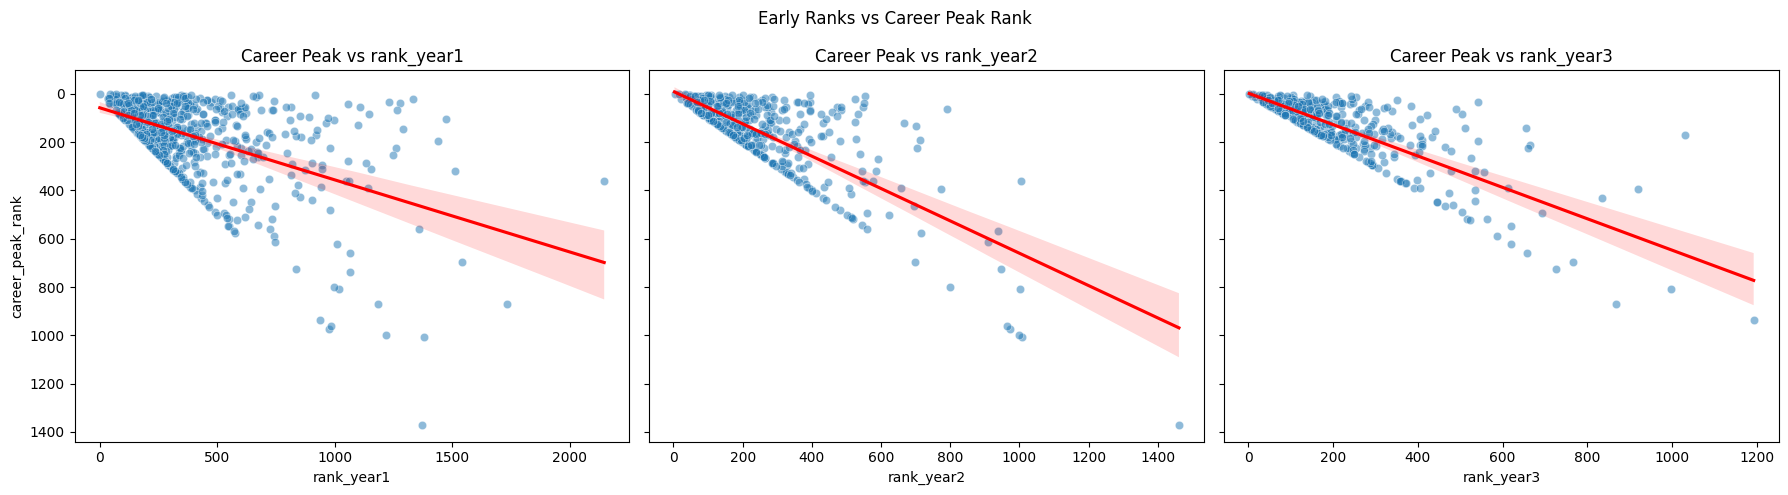

In [931]:
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)
for i, col in enumerate(["rank_year1","rank_year2","rank_year3"]):
    sns.scatterplot(data=filtered, x=col, y="career_peak_rank", alpha=0.5, ax=axes[i])
    sns.regplot(data=filtered, x=col, y="career_peak_rank", scatter=False, color="red", ax=axes[i])
    axes[i].invert_yaxis()  
    axes[i].set_title(f"Career Peak vs {col}")
plt.suptitle("Early Ranks vs Career Peak Rank"); plt.tight_layout(); plt.show()


1, the regression line is relatively flat, but the scatter is widely spread in the first graph. first year ranking is not strongly related to the career peak rank.

2, in the second graph, the line is steeper, and the points are more concentrated.

3, Although Year 3 also shows a strong relationship, it is only marginally better than Year 2. 



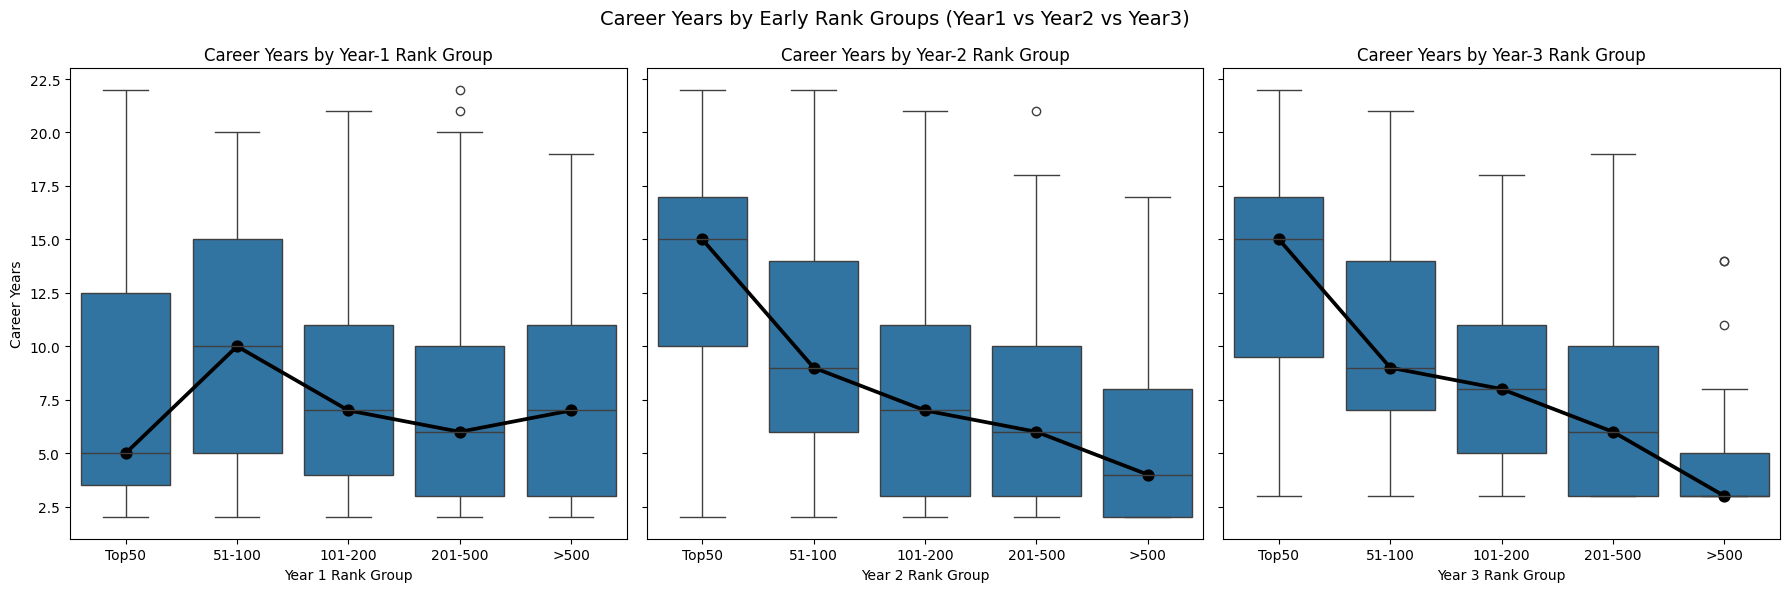

In [932]:



bins = [0, 50, 100, 200, 500, np.inf]
labels = ["Top50","51-100","101-200","201-500",">500"]


tmp = filtered.copy()
tmp["rank1_group"] = pd.cut(tmp["rank_year1"], bins=bins, labels=labels, include_lowest=True)
tmp["rank2_group"] = pd.cut(tmp["rank_year2"], bins=bins, labels=labels, include_lowest=True)
tmp["rank3_group"] = pd.cut(tmp["rank_year3"], bins=bins, labels=labels, include_lowest=True)


fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)

# Year1
sns.boxplot(data=tmp, x="rank1_group", y="career_years", showfliers=True, ax=axes[0])
sns.pointplot(data=tmp, x="rank1_group", y="career_years", estimator=np.median, 
              color="black", errorbar=None, ax=axes[0])
axes[0].set_title("Career Years by Year-1 Rank Group")
axes[0].set_xlabel("Year 1 Rank Group")
axes[0].set_ylabel("Career Years")

# Year2
sns.boxplot(data=tmp, x="rank2_group", y="career_years", showfliers=True, ax=axes[1])
sns.pointplot(data=tmp, x="rank2_group", y="career_years", estimator=np.median, 
              color="black", errorbar=None, ax=axes[1])
axes[1].set_title("Career Years by Year-2 Rank Group")
axes[1].set_xlabel("Year 2 Rank Group")
axes[1].set_ylabel("")

# Year3
sns.boxplot(data=tmp, x="rank3_group", y="career_years", showfliers=True, ax=axes[2])
sns.pointplot(data=tmp, x="rank3_group", y="career_years", estimator=np.median, 
              color="black", errorbar=None, ax=axes[2])
axes[2].set_title("Career Years by Year-3 Rank Group")
axes[2].set_xlabel("Year 3 Rank Group")
axes[2].set_ylabel("")

plt.suptitle("Career Years by Early Rank Groups (Year1 vs Year2 vs Year3)", fontsize=14)
plt.tight_layout()
plt.show()



In the first chart, there is no clear trend, Top 50 only 5 years and Top 100 is 10 years. Indicating that players’ career years is not strongly related to their first-year performance. 

In the second and third charts, the trend is more clear: the better the early performance, the longer the players’ careers tend to be.

Summary:

The first-year performance does not have a particularly strong relationship with a player’s future career top ranking or length.

In contrast, the second-year performance shows a much clearer relation with both career peak and career length. 
 The better a player performs in the second year, the higher the chance of reaching top rankings in the future, and the longer their career tends to be.

The trend in the third year is almost the same as in the second year, so it is sufficient to rely on the second-year results. Predictions can be made one year earlier.

Future projects could therefore focus on using a player’s second-year performance to predict the probability of reaching Top 100, Top 50, or Top 10, or more directly to estimate how many years the player’s career will last and what their rankings might look like each year.

In addition, this dataset does not include players’ age, nationality, or handedness. If these information were available, it would likely improve the accuracy of predictions.

Github: https://github.com/Yifei-Pan-1163295/1163295.git

### Assignment 3 starts from here

- Feature Engineering

In [933]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# some more data processing...
# Records with missing rank_year2 values were removed, since the prediction task focuses on early-career performance (first two years).
filtered = filtered.dropna(subset=["rank_year2"])
# Add feature: matches played in the first two years
matches = pd.read_csv('atp_tennis.csv')
matches["Year"] = pd.to_datetime(matches["Date"], errors="coerce").dt.year
long = pd.concat(
    [
        matches[["Year", "Player_1"]].rename(columns={"Player_1": "player"}),
        matches[["Year", "Player_2"]].rename(columns={"Player_2": "player"}),
    ],
    ignore_index=True
).dropna(subset=["player", "Year"])
plyr_year_counts = (
    long.groupby(["player", "Year"])
        .size()
        .reset_index(name="matches")
)
tmp1 = plyr_year_counts.rename(columns={"Year": "first_year", "matches": "matches_y1"})
m1 = filtered.merge(tmp1, on=["player", "first_year"], how="left")
m1["second_year"] = m1["first_year"].astype(int) + 1
tmp2 = plyr_year_counts.rename(columns={"Year": "second_year", "matches": "matches_y2"})
m2 = m1.merge(tmp2, on=["player", "second_year"], how="left")
m2["matches_y1"] = m2["matches_y1"].fillna(0).astype(int)
m2["matches_y2"] = m2["matches_y2"].fillna(0).astype(int)
m2["matches_first_two_years"] = m2["matches_y1"] + m2["matches_y2"]
filtered = m2
filtered.head(10)

,initial,player,first_year,last_year,career_years,career_peak_rank,rank_year1,rank_year2,rank_year3,top100_count,top50_count,top20_count,top10_count,rank_2000,rank_2001,rank_2002,rank_2003,rank_2004,rank_2005,rank_2006,rank_2007,rank_2008,rank_2009,rank_2010,rank_2011,rank_2012,rank_2013,rank_2014,rank_2015,rank_2016,rank_2017,rank_2018,rank_2019,rank_2020,rank_2021,rank_2022,rank_2023,rank_2024,rank_2025,matches_y1,second_year,matches_y2,matches_first_two_years
0,A,Abel M.,2002,2004,3,191,238.0,191.0,411.0,0,0,0,0,NaN,NaN,238.0,191.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2003,5,7
1,A,Acasuso J.,2001,2011,11,20,77.0,38.0,40.0,10,8,1,0,NaN,77.0,38.0,40.0,67.0,43.0,20.0,28.0,40.0,35.0,49.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,2002,38,57
2,A,Ahouda A.,2016,2018,3,727,834.0,946.0,727.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834.0,946.0,727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2,3
3,A,Ajdukovic D.,2021,2024,4,110,275.0,276.0,299.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,276.0,299.0,110.0,NaN,2,2022,1,3
4,A,Aldi F.,2003,2006,4,112,308.0,146.0,112.0,0,0,0,0,NaN,NaN,NaN,308.0,146.0,112.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2004,1,2
5,A,Allegro Y.,2001,2004,4,210,310.0,232.0,210.0,0,0,0,0,NaN,310.0,232.0,210.0,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2002,5,7
6,A,Almagro N.,2003,2018,16,9,189.0,99.0,76.0,14,11,7,2,NaN,NaN,NaN,189.0,99.0,76.0,36.0,26.0,12.0,18.0,16.0,9.0,10.0,11.0,17.0,69.0,41.0,43.0,661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2004,9,10
7,A,Alund M.,2013,2014,2,91,91.0,131.0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,2014,3,17
8,A,Amritraj P.,2002,2013,12,159,714.0,333.0,280.0,0,0,0,0,NaN,NaN,714.0,333.0,280.0,277.0,241.0,393.0,278.0,159.0,212.0,NaN,NaN,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2003,5,7
9,A,Ancic M.,2002,2010,9,9,109.0,65.0,28.0,7,6,3,2,NaN,NaN,109.0,65.0,28.0,17.0,10.0,9.0,24.0,28.0,422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2003,31,40


In [934]:
# Feature engineering based on Year 1 & 2 

# Rank improvement between Year 1 and Year 2
filtered["rank_improvement_1_2"] = filtered["rank_year2"] - filtered["rank_year1"]
# Relative improvement percentage between Year 1 and Year 2
filtered["rank_rel_improve_pct"] = (
    (filtered["rank_year2"] - filtered["rank_year1"]) / filtered["rank_year1"])
# Stability (how consistent player's early ranking is)
filtered["rank_std_1_2"] = filtered[["rank_year1", "rank_year2"]].std(axis=1)
# Mean rank of Year 1 and Year 2
filtered["rank_mean_1_2"] = filtered[["rank_year1", "rank_year2"]].mean(axis=1)
# Better early rank (minimum between the two)
filtered["rank_best_1_2"] = filtered[["rank_year1", "rank_year2"]].min(axis=1)
# Binary feature: whether player reached top 100 within first 2 years
filtered["top100_in_2yrs"] = (filtered[["rank_year1", "rank_year2"]] <= 100).any(axis=1).astype(int)

# Top N counts within first 2 years
filtered["top10_count_2yr"]  = (filtered[["rank_year1", "rank_year2"]] <= 10).sum(axis=1)
filtered["top20_count_2yr"]  = (filtered[["rank_year1", "rank_year2"]] <= 20).sum(axis=1)
filtered["top50_count_2yr"]  = (filtered[["rank_year1", "rank_year2"]] <= 50).sum(axis=1)
filtered["top100_count_2yr"] = (filtered[["rank_year1", "rank_year2"]] <= 100).sum(axis=1)

#Composite feature: "performance index", higher weights assigned to better rankings
filtered["performance_index_2yrs"] = (
    4*filtered["top10_count_2yr"] +
    3*filtered["top20_count_2yr"] +
    2*filtered["top50_count_2yr"] +
    1*filtered["top100_count_2yr"]
)
# Add match count features
filtered[["matches_y1", "matches_y2", "matches_first_two_years"]] = filtered[
    ["matches_y1", "matches_y2", "matches_first_two_years"]
].fillna(0)
# Drop identifier and non-numeric columns
drop_cols = ["initial", "player", "first_year", "last_year", "career_peak_rank"]
feature_cols = [
    "rank_improvement_1_2",
    "rank_rel_improve_pct",
    "rank_std_1_2",
    "rank_mean_1_2",
    "rank_best_1_2",
    "top100_in_2yrs",
    "top10_count_2yr", "top20_count_2yr", "top50_count_2yr", "top100_count_2yr",
    "performance_index_2yrs",
    "matches_y1",
    "matches_y2",
    "matches_first_two_years",
] 

X = filtered[feature_cols].copy()
y = filtered["career_peak_rank"].copy()

RANDOM_STATE = 42
# (1) SelectKBest: linear correlation (F-test) 
selector = SelectKBest(score_func=f_regression, k="all")
selector.fit(X, y)
kbest_scores = pd.DataFrame({
    "Feature": feature_cols,
    "F_Score": selector.scores_,
    "p_value": selector.pvalues_
}).sort_values("F_Score", ascending=False)

print("=== SelectKBest (F-test) Feature Scores ===")
print(kbest_scores)

# (2) RandomForest: nonlinear importance 
rf = RandomForestRegressor(n_estimators=300, random_state=RANDOM_STATE)
rf.fit(X.fillna(0), y)
rf_importance = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

print("\n=== RandomForest Feature Importances ===")
print(rf_importance)




=== SelectKBest (F-test) Feature Scores ===
                    Feature     F_Score        p_value
4             rank_best_1_2  832.666743  1.198305e-107
3             rank_mean_1_2  427.277970   1.101717e-68
12               matches_y2   72.877684   1.751627e-16
13  matches_first_two_years   70.574161   4.848000e-16
5            top100_in_2yrs   62.331572   1.924440e-14
9          top100_count_2yr   54.993967   5.375605e-13
11               matches_y1   35.975515   3.889190e-09
10   performance_index_2yrs   26.499166   3.826655e-07
1      rank_rel_improve_pct   17.455711   3.483498e-05
8           top50_count_2yr   12.792695   3.825929e-04
2              rank_std_1_2    8.306084   4.125068e-03
7           top20_count_2yr    1.626309   2.028198e-01
6           top10_count_2yr    0.900696   3.430640e-01
0      rank_improvement_1_2    0.424406   5.150529e-01

=== RandomForest Feature Importances ===
rank_best_1_2              0.727381
rank_mean_1_2              0.087351
rank_rel_improve_

From the first two years of the players professional career, several ranking-based metrics were derived, including 
- rank improvement, 
- relative improvement percentage, 
- mean rank, best rank,
- ranking stability (standard deviation)

In addition, binary and count-based features were created to represent the number of times a player entered the Top 10, Top 20, Top 50, or Top 100 rankings, as well as whether they achieved the Top 100 within two years.
To reflect overall competitiveness, a composite performance index was introduced, weighting Top 10 appearances more heavily than lower ranks (4×Top10 + 3×Top20 + 2×Top50 + 1×Top100).
Furthermore, match participation features (matches_y1, matches_y2, and matches_first_two_years) were added, representing the total number of matches played during the first two seasons.

For feature selection, two complementary approaches were used:
- (1) SelectKBest (F-test / ANOVA) was used to evaluate linear correlations between each feature and the target variable (career_peak_rank).
- (2) RandomForest was applied to assess non-linear relationships and feature interactions within the data.
This dual-method approach ensured that both simple and complex dependencies were captured.

The F-test results showed that "rank_best_1_2"(best result in the first two years), "rank_mean_1_2"(mean result in the first two years), and "matches_y2" (matches played in the second year), "matches_first_two_years"(matches played in the first two years) were most strongly correlated with career peak ranking (F > 70, p < 0.001).
Random Forest analysis confirmed that rank_best_1_2 dominated predictive importance (~0.73), followed by rank_mean_1_2 (~0.09), rank_rel_improve_pct (~0.04), rank_std_1_2 (~0.037), and matches_y2 (~0.035).

These results indicate that a player's early-career ranking performance and their level of match participation are the most influential predictors of long-term success.




- Supervised Learning

In [935]:
# ---- Preprocessing: Imputation + Scaling ----
num_pipe = Pipeline([
    ("scaler", StandardScaler())  # StandardScaler
])
preprocess = ColumnTransformer([
    ("num", num_pipe, feature_cols)
])

#The parameter random_state=42 ensures reproducibility of results by fixing the seed for all random operations
RANDOM_STATE = 42
# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# === Ridge Regression ===
ridge_model = Pipeline([
    ("prep", preprocess),
    ("model", RidgeCV(alphas=(0.1, 1.0, 10.0)))
])
# Evaluate the Ridge model using the same cross-validation setup as Random Forest 
ridge_mae = -cross_val_score(ridge_model, X, y, cv=cv, scoring="neg_mean_absolute_error")
ridge_r2  =  cross_val_score(ridge_model, X, y, cv=cv, scoring="r2")

print(f"RidgeCV | MAE: {ridge_mae.mean():.2f} ± {ridge_mae.std():.2f} | R²: {ridge_r2.mean():.3f} ± {ridge_r2.std():.3f}")

# === Random Forest Regression ===
rf_model = Pipeline([
    ("prep", ColumnTransformer([
        ("num", SimpleImputer(strategy="median"), feature_cols)
    ])),
    ("model", RandomForestRegressor(n_estimators=400, random_state=RANDOM_STATE))
])
# Evaluate the Random Forest model using 5-fold cross-validation
rf_mae = -cross_val_score(rf_model, X, y, cv=cv, scoring="neg_mean_absolute_error")
rf_r2  =  cross_val_score(rf_model, X, y, cv=cv, scoring="r2")

print(f"RandomForest | MAE: {rf_mae.mean():.2f} ± {rf_mae.std():.2f} | R²: {rf_r2.mean():.3f} ± {rf_r2.std():.3f}")


RidgeCV | MAE: 69.04 ± 8.01 | R²: 0.531 ± 0.206
RandomForest | MAE: 70.42 ± 6.15 | R²: 0.463 ± 0.231


The task for this study is forecasting, aiming to predict a player’s career peak ranking based on early-career performance indicators.
This problem is formulated as a supervised regression task, where the target variable (career_peak_rank) is continuous.

Two regression models, Ridge Regression and Random Forest Regressor, were implemented to perform the forecasting.
- Ridge Regression was selected because it is a linear model with L2 regularization, which helps control overfitting and handle multicollinearity among correlated features.
It provides interpretable coefficients that indicate the relative importance of each early-career indicator.
- Random Forest Regressor was chosen as a nonlinear ensemble method capable of capturing complex interactions between features.
It serves as a useful benchmark against Ridge Regression to evaluate whether nonlinear relationships can improve prediction accuracy.

The performance of both regression models was evaluated using 5-fold cross-validation to ensure generalisation and reliability across different data splits.
Two key performance measures were selected — Mean Absolute Error (MAE) and R² (Coefficient of Determination), because they provide complementary insights into model accuracy and explanatory power.
- Mean Absolute Error (MAE) quantifies the average magnitude of prediction errors in the same units as the target variable (ranking positions).
It is straightforward to interpret and less sensitive to extreme outliers compared with squared-error metrics such as MSE.
A lower MAE indicates that the model’s forecasts are, on average, closer to the true career-peak rankings.
- R² (Coefficient of Determination) measures the proportion of variance in the target variable that is explained by the model.
It assesses how well the model captures the overall trend of the data and is a standard indicator of goodness-of-fit for regression tasks.
Higher R² values imply stronger explanatory power and a better fit to observed outcomes.

Using both MAE and R² together provides a balanced evaluation: MAE reflects absolute prediction accuracy, while R² shows the model’s explanatory capability.
Both models deliver consistent and moderately accurate forecasts. RidgeCV slightly outperformed Random Forest (MAE ≈ 69 vs. 70; R² ≈ 0.53 vs. 0.46).
The results suggest that early-career performance and match experience have a predominantly linear relationship with career peak rank.
Both models explained around half of the variance, indicating moderate but realistic predictive accuracy for this type of sports performance data.



Several techniques were applied to prevent overfitting and underfitting during model training.

- For Ridge Regression, the inclusion of L2 regularisation (controlled by the α parameter in RidgeCV) penalises excessively large coefficient values and reduces model variance.
The RidgeCV implementation automatically performs cross-validation to select the optimal α value, ensuring an appropriate trade-off between model bias (underfitting) and variance (overfitting).
In addition, all numerical features were standardised through a preprocessing pipeline, preventing features with large magnitudes from dominating the regression coefficients.
- For the Random Forest Regressor, overfitting was controlled through ensemble averaging — the model builds multiple decision trees on random subsets of data and features, and averages their predictions.
This reduces variance and improves generalisation.
The number of trees (n_estimators=400) was chosen to provide stable results without over-complexity.
Each tree was also limited in depth through internal randomness, which naturally prevents fitting noise in the training data.
5-fold cross-validation was applied across both algorithms, allowing the models to be tested on unseen data in each fold.
The consistent MAE and R² values across folds confirm that neither model suffered from severe overfitting or underfitting.

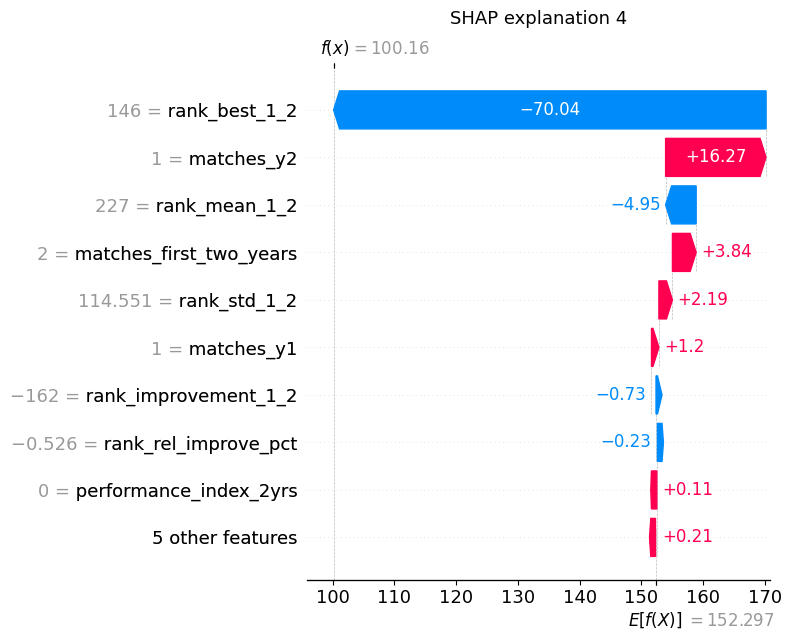

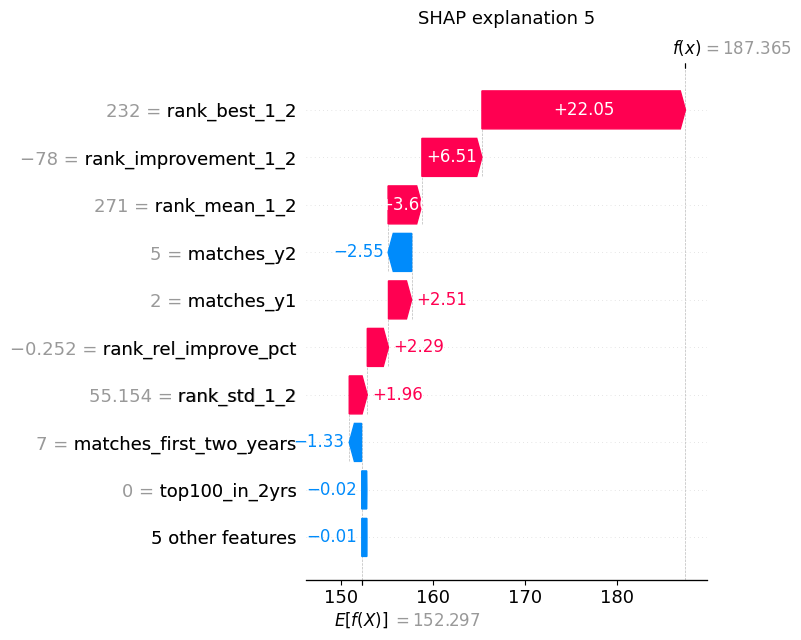

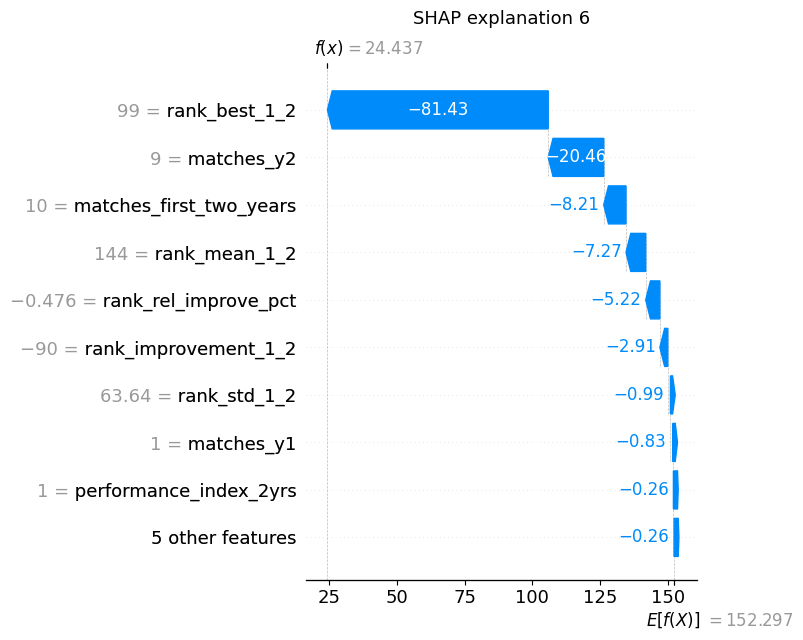

,initial,player,first_year,last_year,career_years,career_peak_rank,rank_year1,rank_year2,rank_year3,top100_count,top50_count,top20_count,top10_count,rank_2000,rank_2001,rank_2002,rank_2003,rank_2004,rank_2005,rank_2006,rank_2007,rank_2008,rank_2009,rank_2010,rank_2011,rank_2012,rank_2013,rank_2014,rank_2015,rank_2016,rank_2017,rank_2018,rank_2019,rank_2020,rank_2021,rank_2022,rank_2023,rank_2024,rank_2025,matches_y1,second_year,matches_y2,matches_first_two_years,rank_improvement_1_2,rank_rel_improve_pct,rank_std_1_2,rank_mean_1_2,rank_best_1_2,top100_in_2yrs,top10_count_2yr,top20_count_2yr,top50_count_2yr,top100_count_2yr,performance_index_2yrs
0,A,Abel M.,2002,2004,3,191,238.0,191.0,411.0,0,0,0,0,NaN,NaN,238.0,191.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2003,5,7,-47.0,-0.197479,33.234019,214.5,191.0,0,0,0,0,0,0
1,A,Acasuso J.,2001,2011,11,20,77.0,38.0,40.0,10,8,1,0,NaN,77.0,38.0,40.0,67.0,43.0,20.0,28.0,40.0,35.0,49.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,2002,38,57,-39.0,-0.506494,27.577164,57.5,38.0,1,0,0,1,2,4
2,A,Ahouda A.,2016,2018,3,727,834.0,946.0,727.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834.0,946.0,727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2,3,112.0,0.134293,79.195959,890.0,834.0,0,0,0,0,0,0
3,A,Ajdukovic D.,2021,2024,4,110,275.0,276.0,299.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,276.0,299.0,110.0,NaN,2,2022,1,3,1.0,0.003636,0.707107,275.5,275.0,0,0,0,0,0,0
4,A,Aldi F.,2003,2006,4,112,308.0,146.0,112.0,0,0,0,0,NaN,NaN,NaN,308.0,146.0,112.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2004,1,2,-162.0,-0.525974,114.551299,227.0,146.0,0,0,0,0,0,0
5,A,Allegro Y.,2001,2004,4,210,310.0,232.0,210.0,0,0,0,0,NaN,310.0,232.0,210.0,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2002,5,7,-78.0,-0.251613,55.154329,271.0,232.0,0,0,0,0,0,0
6,A,Almagro N.,2003,2018,16,9,189.0,99.0,76.0,14,11,7,2,NaN,NaN,NaN,189.0,99.0,76.0,36.0,26.0,12.0,18.0,16.0,9.0,10.0,11.0,17.0,69.0,41.0,43.0,661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2004,9,10,-90.0,-0.476190,63.639610,144.0,99.0,1,0,0,0,1,1
7,A,Alund M.,2013,2014,2,91,91.0,131.0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,2014,3,17,40.0,0.439560,28.284271,111.0,91.0,1,0,0,0,1,1
8,A,Amritraj P.,2002,2013,12,159,714.0,333.0,280.0,0,0,0,0,NaN,NaN,714.0,333.0,280.0,277.0,241.0,393.0,278.0,159.0,212.0,NaN,NaN,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2003,5,7,-381.0,-0.533613,269.407684,523.5,333.0,0,0,0,0,0,0
9,A,Ancic M.,2002,2010,9,9,109.0,65.0,28.0,7,6,3,2,NaN,NaN,109.0,65.0,28.0,17.0,10.0,9.0,24.0,28.0,422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2003,31,40,-44.0,-0.403670,31.112698,87.0,65.0,1,0,0,0,1,1


In [936]:

# SHAP 
import shap
import matplotlib.pyplot as plt
rf_model.fit(X, y)

# Transform features using the same preprocessing pipeline
prep = rf_model.named_steps["prep"]
X_imp = pd.DataFrame(prep.transform(X), columns=feature_cols)

# Create a TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf_model.named_steps["model"])

# Compute SHAP values
sv = explainer(X_imp)

# Choose one instance to explain 
idx = 4

# Plot the waterfall figure 
plt.figure(figsize=(9, 5))
shap.plots.waterfall(sv[idx], show=False)
plt.title("SHAP explanation 4", fontsize=13, pad=10)
plt.tight_layout()
plt.show()

# Choose one instance to explain 
idx = 5

# Plot the waterfall figure 
plt.figure(figsize=(9, 5))
shap.plots.waterfall(sv[idx], show=False)
plt.title("SHAP explanation 5", fontsize=13, pad=10)
plt.tight_layout()
plt.show()

# Choose one instance to explain 
idx = 6

# Plot the waterfall figure 
plt.figure(figsize=(9, 5))
shap.plots.waterfall(sv[idx], show=False)
plt.title("SHAP explanation 6", fontsize=13, pad=10)
plt.tight_layout()
plt.show()

filtered.head(10)

Explainable AI — SHAP 

SHAP was applied to the Random Forest model to identify which early-career features influence the prediction of a player’s career peak rank.

Three player instances were analyzed.

- Instance 4 (Aldi F., f(x)=100.2, actual rank =112) shows a moderate prediction, where rank_best_1_2 (–70.0) improves the result, while matches_y2 (+16.3) slightly worsens it. The predicted and actual ranks are closely aligned, indicating good model accuracy for mid-level players.

- Instance 5 (Allegro Y., f(x)=187.4, actual rank =210) indicates poor predicted performance, mainly driven by rank_best_1_2 (+22.0) and rank_improvement_1_2 (+6.5). The model slightly overestimates the player’s ability.

- Instance 6 (Almagro N., f(x)=24.4, actual rank =9) represents excellent performance, as rank_best_1_2 (–81.4) and matches_y2 (–20.5) strongly reduce the predicted rank. The model underestimates slightly but correctly identifies the player as a top performer.

These explanations confirm that early-career rankings and match participation are the most influential predictors.